원본 이미지 shape: (429, 640, 3)
입력 이미지 shape: (1, 429, 640, 3)
3채널 -> 1채널: (1, 429, 640, 1)
filter shape: (3, 3, 1, 1)
conv2d 결과 shape: (1, 427, 638, 1)
4차원 -> 3차원 shape: (427, 638, 1)


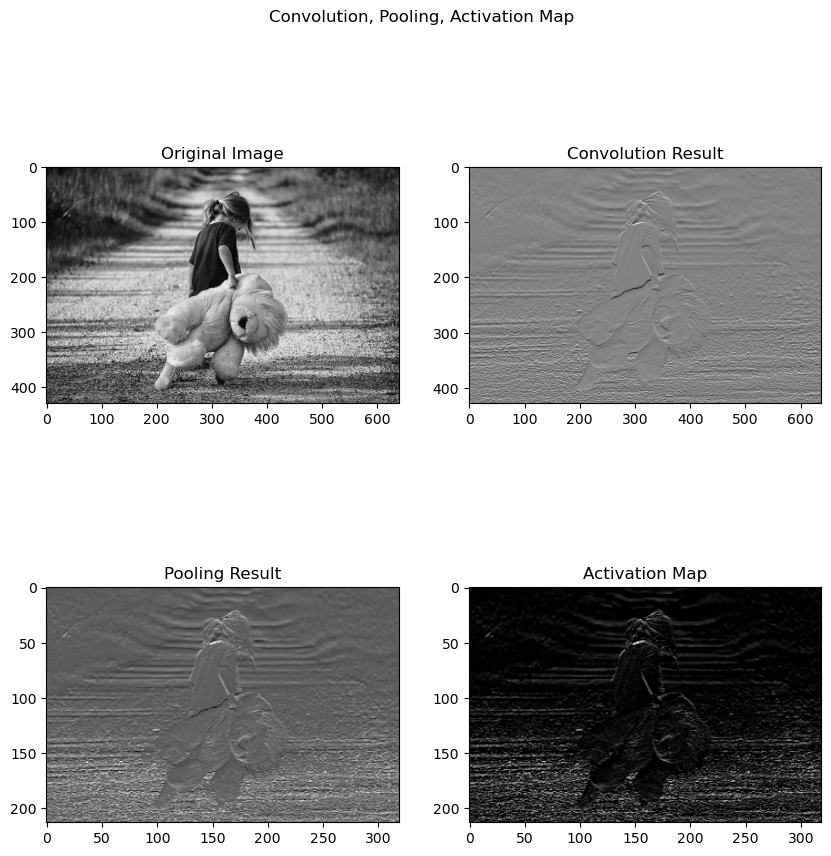

In [2]:
# Convolusion 연산을 수행해서 그 결과를 확인해 봅시다.
# 이미지의 특징을 추출한다는 의미가 무엇일까?
# 눈으로 확인해 보자
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img # 맷플롯립의 이미지 처리 모듈

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1) # 1행 2열의 1번째 (왼쪽 위 그림 영역)
ax2 = fig.add_subplot(2, 2, 2) # 1행 2열의 2번 (오른쪽 위 그림 영역)
ax3 = fig.add_subplot(2, 2, 3) # 1행 3열의 3번 (왼쪽 아래쪽 그림 영역)
ax4 = fig.add_subplot(2, 2, 4) # 1행 3열의 4번 (오른쪽 아래쪽 그림 영역)

# 이미지 픽셀 로딩
ori_image = img.imread("./image/girl-and-teddy.png")

ax1.set_title("Original Image")
ax1.imshow(ori_image)

# 원본 이미지의 shape
print("원본 이미지 shape:", ori_image.shape) # (height, width, channel) = (429, 640, 3)

# tensorflow의 convolution API를 이용하려면 입력 Shape이 4차원이 되어야 한다!
# shape을 4차원으로 변환할 필요

# 입력 형태는 (이미지 개수, 이미지 세로, 이미지 가로, 채널) => (1, 429, 640, 3)
input_image = ori_image.reshape((1,) + ori_image.shape)
# 실수 연산을 위해 데이터 타입을 변환
input_image = input_image.astype('float32')
print("입력 이미지 shape:", input_image.shape) # (1, 429, 640, 3)

channel_1_input_image = input_image[:, :, :, 0:1]
print("3채널 -> 1채널:", channel_1_input_image.shape) # 3채널 -> 1채널 : (1, 429, 640, 1)

# filter를 준비 (특징을 추출하는 역할)
# filter의 형태 (필터 높이, 필터 너비, 필터 채널수, 필터 개수)

# (3, 3, 1, 1) => 3 x 3 크기의 1채널 필터 1개
# 세로 선 강조
# filter = np.array([[[[-1]],[[0]],[[1]]],
#                    [[[-1]],[[0]],[[1]]],
#                    [[[-1]],[[0]],[[1]]]])

# 가로 선 강조
filter = np.array([[[[1]],[[1]],[[1]]],
                   [[[0]],[[0]],[[0]]],
                   [[[-1]],[[-1]],[[-1]]]])

print("filter shape:", filter.shape)

conv2d = tf.nn.conv2d(channel_1_input_image,
                      filter,
                      strides=(1, 1, 1, 1),
                      padding='VALID')
conv2d_result = conv2d.numpy()
print("conv2d 결과 shape:", conv2d_result.shape) # (1, 427, 638, 1) => (입력 이미지 수, 세로, 가로, 필터 수)
t_img = conv2d_result[0, :, :, :] # 4차원 -> 3차원
print("4차원 -> 3차원 shape:", t_img.shape)

ax2.set_title("Convolution Result")
ax2.imshow(t_img, cmap='gray')

# pooling 처리를 해서 이미지의 크기를 줄임
pooling = tf.nn.max_pool(conv2d_result,
                         ksize=(1, 2, 2, 1), # 커널 사이즈
                         strides=(1, 2, 2, 1),
                         padding='VALID')
pool_image = pooling.numpy()
pool_img = pool_image[0, :, :, :]

ax3.set_title("Pooling Result")
ax3.imshow(pool_img, cmap='gray')

# conv2d와 pooling 처리된 이미지에 활성화 함수를 적용해서 Activation Map을 만들어 보자
activation_map = tf.nn.relu(pool_image) # ReLU 활성화 함수 적용
activation_map_img = activation_map[0, :, :, :]

ax4.set_title("Activation Map")
ax4.imshow(activation_map_img, cmap='gray')

# 전체 그래프의 타이틀
fig.suptitle("Convolution, Pooling, Activation Map")

plt.show()